# Comprobar la distribución de una característica
A veces es bueno conocer qué distribución siguen los valores de una característica. Nos puede ayudar para saber qué modelos son más adecuados o para aplicar transformaciones que faciliten el aprendizaje.

Como primer ejemplo vamos a ver si las características del conjunto de datos 'delta_elevators' del repositorio de OpenML se ajustan a [distribuciones normales](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal).

![Gráfica de varias distribuciones normales](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Normal_distribution_pdf.png/325px-Normal_distribution_pdf.png)

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
dataset = datasets.fetch_openml(name='delta_elevators', version=1, as_frame=True)
tabla = dataset.frame
tabla

,climbRate,Altitude,RollRate,curRoll,diffClb,diffDiffClb,Se
0,2.0,-50.0,-0.0048,-0.001,0.2,0.00,-0.001
1,6.5,-40.0,-0.0010,-0.009,0.2,0.00,0.003
2,-5.9,-10.0,-0.0033,-0.004,-0.1,0.00,-0.001
3,-6.2,-30.0,-0.0022,-0.011,0.1,0.00,-0.002
4,-0.2,-40.0,0.0059,-0.005,0.1,0.00,0.001
...,...,...,...,...,...,...,...
9512,5.0,-30.0,0.0013,-0.004,0.2,0.00,0.004
9513,1.4,0.0,0.0024,0.019,-0.2,-0.01,-0.001
9514,-3.5,-10.0,-0.0082,0.004,-0.1,0.00,-0.003
9515,-2.4,-10.0,-0.0065,-0.012,0.2,-0.02,-0.001


Una visión rápida de los histogramas de las características de la tabla nos dará una primera impresión de como están distribuidos los datos.

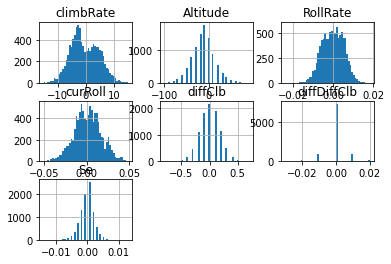

In [3]:
import matplotlib.pyplot as plt
tabla.hist(bins=50)
plt.show()

En este conjunto de datos, casi todas las características parecen asemejarse algo a la distribución normal pero hay algunas que son claramente discretas (tienen huecos sin valores) y otras con cosas que no parecen ajustarse a la curva Gausiana (doble pico, asimetría). Podemos hacer un test estadístico para ver cuales son significativamente diferentes de la normal o si esas anormalidades que vemos pueden ser causa de la aleatoriedad.

En este test estadístico la hipotesis nula $H_0$ es que la distribución sea una normal. Por tanto, si sale un valor de p-value pequeño, podemos descartar que sea una Normal pues sólo hay esa p-value probabilidad de descartarla por error. Sin embargo, si no es así, no sabemos la probabilidad de que realmente los datos se hayan generado a partir de un proceso con una distribución Normal.

In [4]:
from scipy.stats import normaltest

for columna in tabla:
    stat, p = normaltest(tabla[columna])
    print('{col:>11} stat={stat:7.3f}, p={p:.3f}'.format(stat=stat, p=p, col=columna), end='')
    if p > 0.01:
        print(' -> quizá Normal')
    else:
        print(' -> muy probablemente no Normal')


  climbRate stat=271.687, p=0.000 -> muy probablemente no Normal
   Altitude stat= 82.602, p=0.000 -> muy probablemente no Normal
   RollRate stat=121.291, p=0.000 -> muy probablemente no Normal
    curRoll stat=  1.793, p=0.408 -> quizá Normal
    diffClb stat= 30.876, p=0.000 -> muy probablemente no Normal
diffDiffClb stat=890.530, p=0.000 -> muy probablemente no Normal
         Se stat=158.118, p=0.000 -> muy probablemente no Normal


En este caso, de todas las características, la única que podría estar distribuida con una distribución Normal es 'curRoll'. Las demás queda descartado que puedan considerarse valores normalmente distribuidos.

**Ejercicio**: Escoge otro conjunto de datos de [OpenML](https://www.openml.org/search?type=data) que tenga características con números reales y analiza la distribución de sus características.

Referencias:
https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/